# A304_SRO_NGO_Hall_119K_p1T_to_n1T

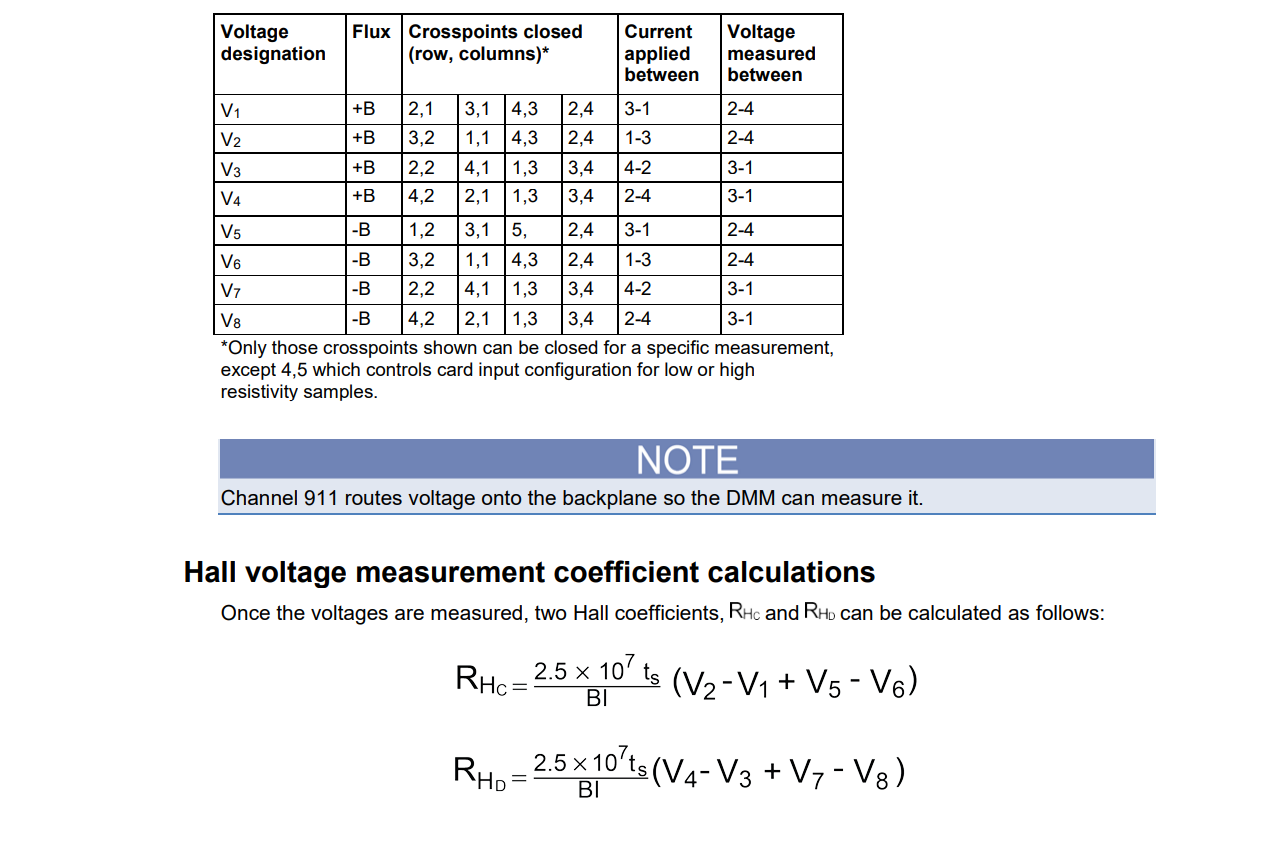

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
filename='C:\\Users\\Admin\\Desktop\\Data\\13june2023\\A304_119K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.223584,119.037259,554.196099,-554.042394,-562.133261,562.172836,6.574000e-07,1000000
1,0.001,9000.440381,119.000006,555.768120,-555.771564,-562.986116,563.026498,6.422000e-07,1000000
2,0.001,8000.524243,119.001502,557.542208,-557.550536,-563.885662,563.912205,6.350000e-07,1000000
3,0.001,7000.244824,119.000620,559.320587,-559.320633,-564.764662,564.795732,6.286000e-07,1000000
4,0.001,6000.399561,118.999715,561.096062,-561.080091,-565.695791,565.693926,6.202000e-07,1000000
...,...,...,...,...,...,...,...,...,...
61,0.001,6000.332642,119.000273,561.078661,-561.087264,-565.552464,565.587358,6.036000e-07,1000000
62,0.001,7000.357397,119.000149,559.262871,-559.260266,-564.683096,564.725994,6.043000e-07,1000000
63,0.001,8000.244238,119.000164,557.489050,-557.479987,-563.830722,563.861669,6.059000e-07,1000000
64,0.001,9000.376025,119.000146,555.696366,-555.723327,-562.974029,562.998897,6.013000e-07,1000000


In [4]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [5]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [6]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.223584,10000,119.037259,-554.196099,554.042394,562.133261,-562.172836,6.574000e-07,1000000
1,0.001,9000.440381,9000,119.000006,-555.768120,555.771564,562.986116,-563.026498,6.422000e-07,1000000
2,0.001,8000.524243,8000,119.001502,-557.542208,557.550536,563.885662,-563.912205,6.350000e-07,1000000
3,0.001,7000.244824,7000,119.000620,-559.320587,559.320633,564.764662,-564.795732,6.286000e-07,1000000
4,0.001,6000.399561,6000,118.999715,-561.096062,561.080091,565.695791,-565.693926,6.202000e-07,1000000


In [7]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

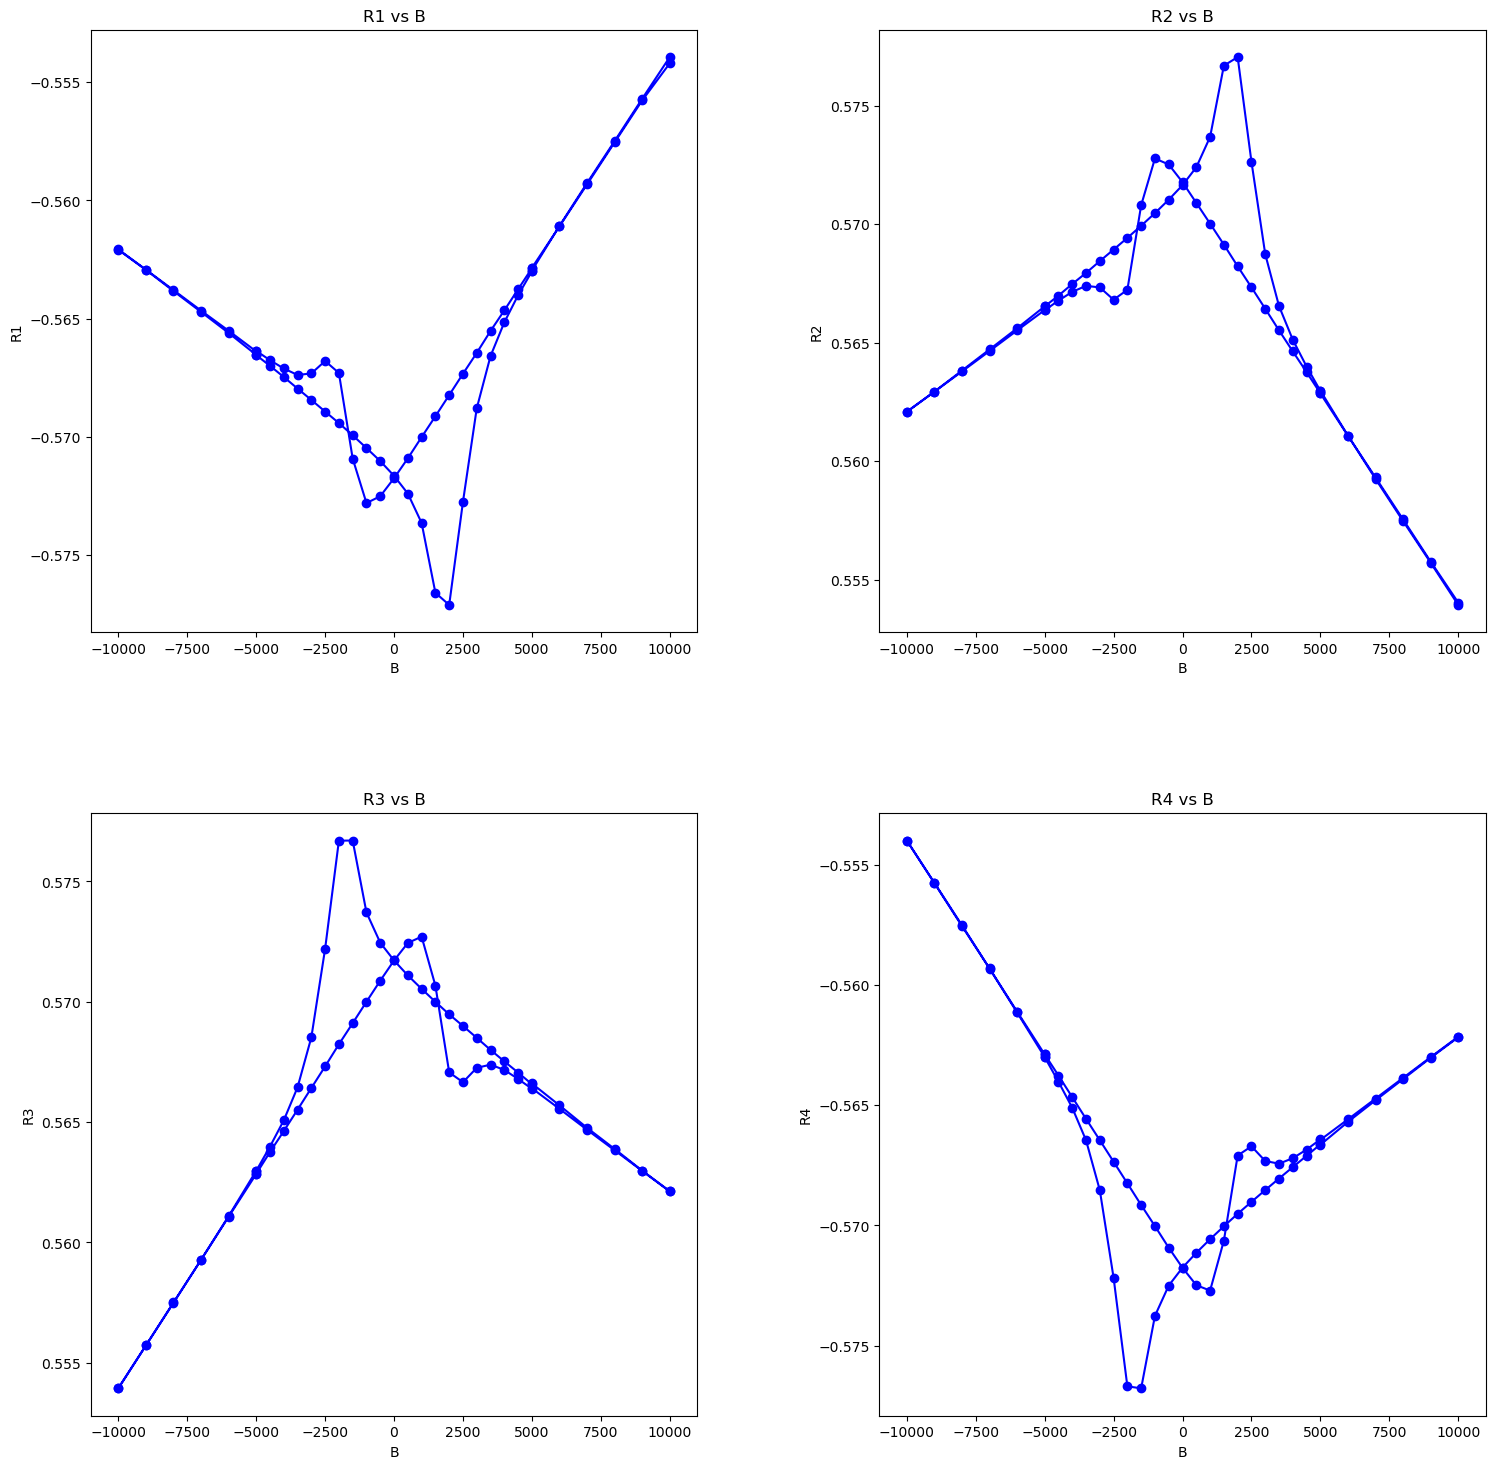

In [8]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [9]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [10]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [11]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [12]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.223584,10000,119.037259,-554.196099,554.042394,562.133261,-562.172836,6.574000e-07,1000000
1,0.001,9000.440381,9000,119.000006,-555.768120,555.771564,562.986116,-563.026498,6.422000e-07,1000000
2,0.001,8000.524243,8000,119.001502,-557.542208,557.550536,563.885662,-563.912205,6.350000e-07,1000000
3,0.001,7000.244824,7000,119.000620,-559.320587,559.320633,564.764662,-564.795732,6.286000e-07,1000000
4,0.001,6000.399561,6000,118.999715,-561.096062,561.080091,565.695791,-565.693926,6.202000e-07,1000000


In [13]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.344531,-10000,119.000302,-562.091067,562.084161,553.950445,-553.984915,6.213000e-07,1000000
34,0.001,-9000.610693,-9000,119.000520,-562.938277,562.940113,555.723734,-555.757135,6.295000e-07,1000000
35,0.001,-8000.442700,-8000,119.000374,-563.835108,563.830407,557.508537,-557.547189,6.160000e-07,1000000
36,0.001,-7000.544385,-7000,119.000294,-564.716553,564.719496,559.277092,-559.308407,6.223000e-07,1000000
37,0.001,-6000.340796,-6000,119.000573,-565.608061,565.614464,561.067436,-561.102997,6.154000e-07,1000000


In [14]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [15]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,119.037259,-554.196099,554.042394,562.133261,-562.172836,-562.091067,562.084161,553.950445,-553.984915,1000000
1,0.001,9000,119.000006,-555.768120,555.771564,562.986116,-563.026498,-562.938277,562.940113,555.723734,-555.757135,1000000
2,0.001,8000,119.001502,-557.542208,557.550536,563.885662,-563.912205,-563.835108,563.830407,557.508537,-557.547189,1000000
3,0.001,7000,119.000620,-559.320587,559.320633,564.764662,-564.795732,-564.716553,564.719496,559.277092,-559.308407,1000000
4,0.001,6000,118.999715,-561.096062,561.080091,565.695791,-565.693926,-565.608061,565.614464,561.067436,-561.102997,1000000


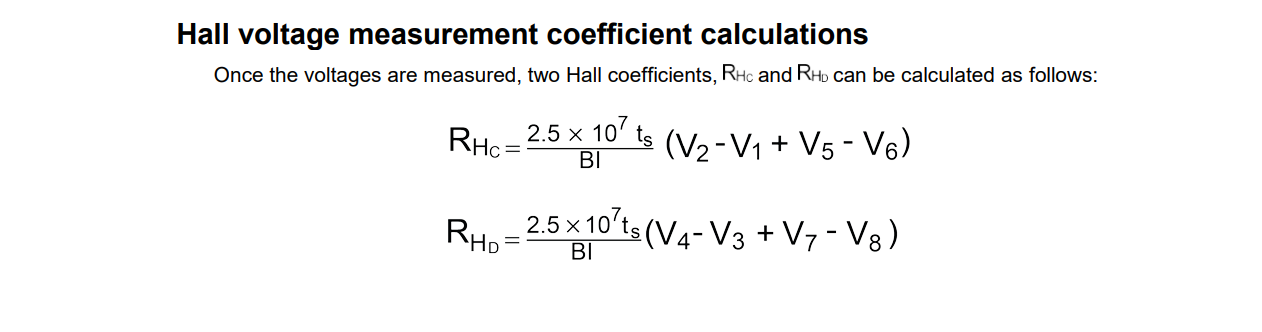
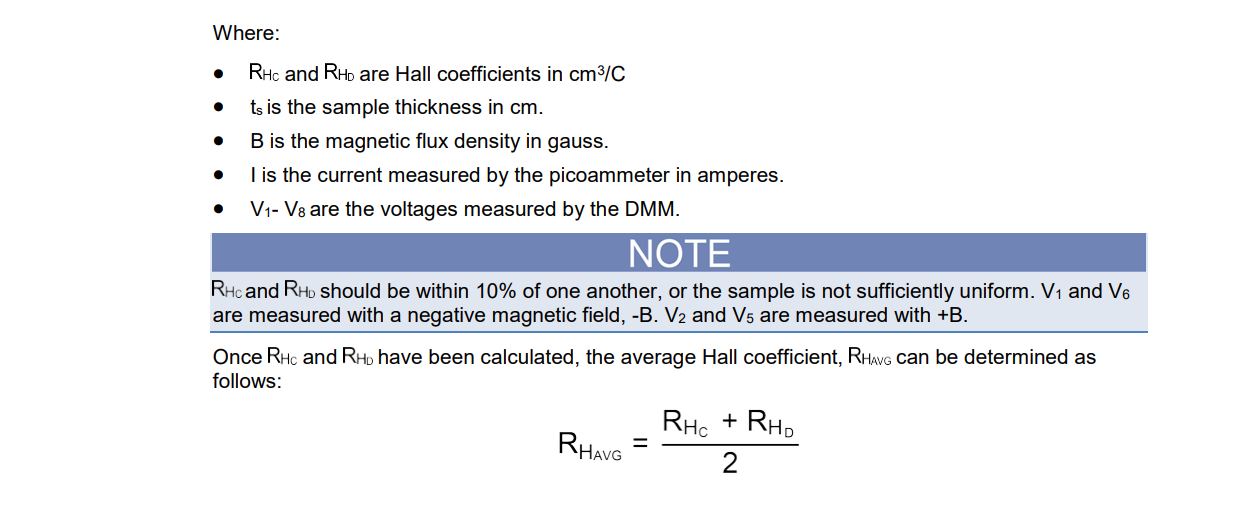

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [16]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

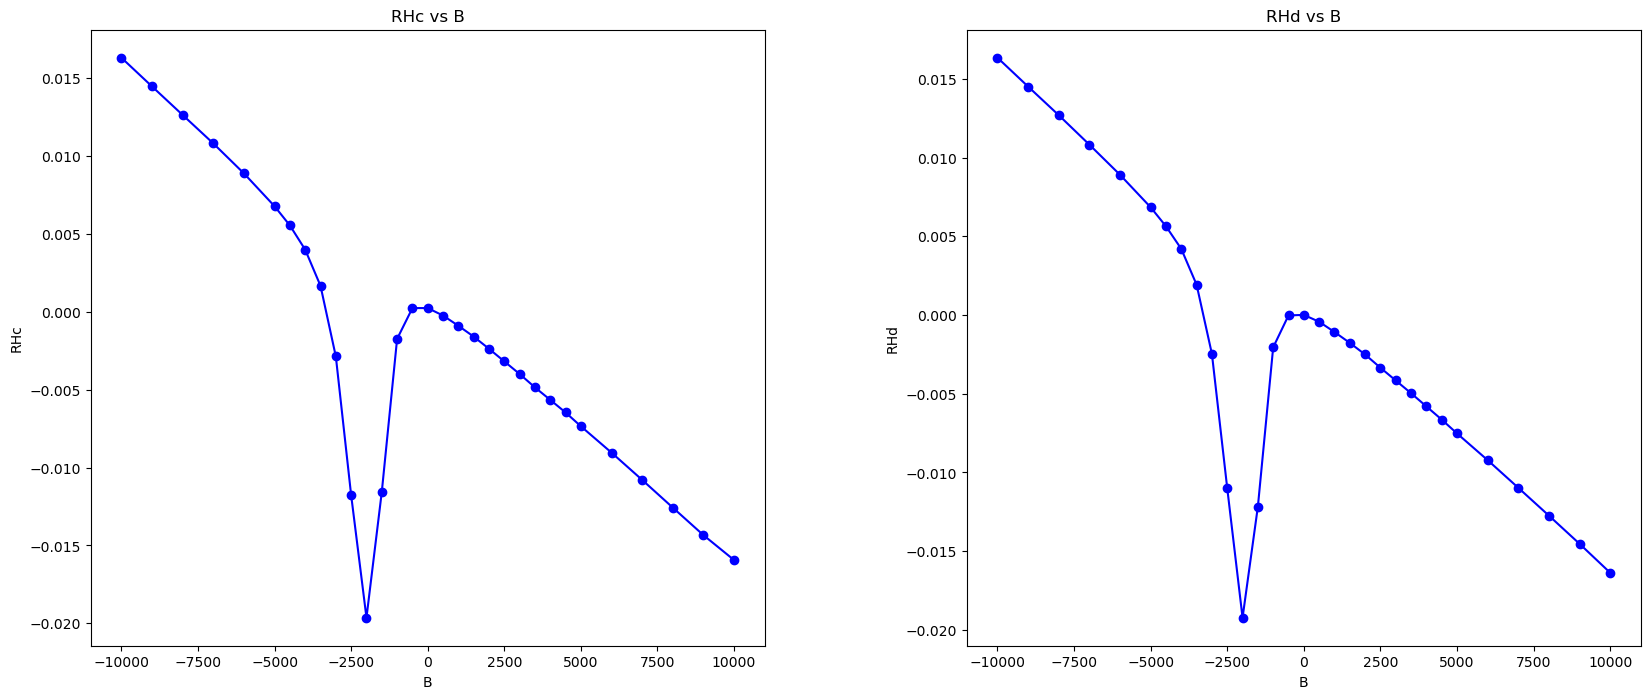

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

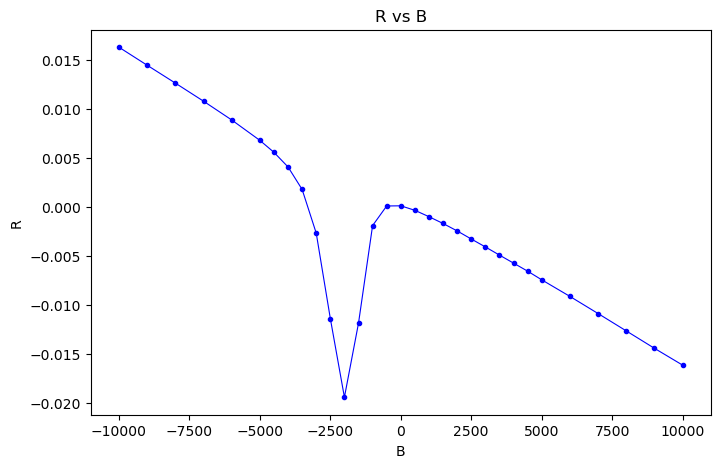

In [18]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [19]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,119.000302,-562.091067,562.084161,553.950445,-553.984915,-554.196099,554.042394,562.133261,-562.172836,1000000
1,0.001,-9000,119.000520,-562.938277,562.940113,555.723734,-555.757135,-555.768120,555.771564,562.986116,-563.026498,1000000
2,0.001,-8000,119.000374,-563.835108,563.830407,557.508537,-557.547189,-557.542208,557.550536,563.885662,-563.912205,1000000
3,0.001,-7000,119.000294,-564.716553,564.719496,559.277092,-559.308407,-559.320587,559.320633,564.764662,-564.795732,1000000
4,0.001,-6000,119.000573,-565.608061,565.614464,561.067436,-561.102997,-561.096062,561.080091,565.695791,-565.693926,1000000


### Hall resistance calculation

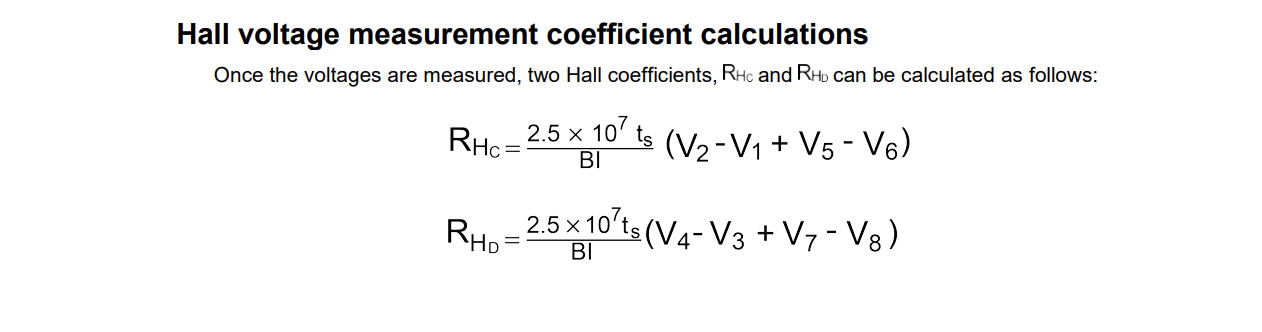

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [20]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

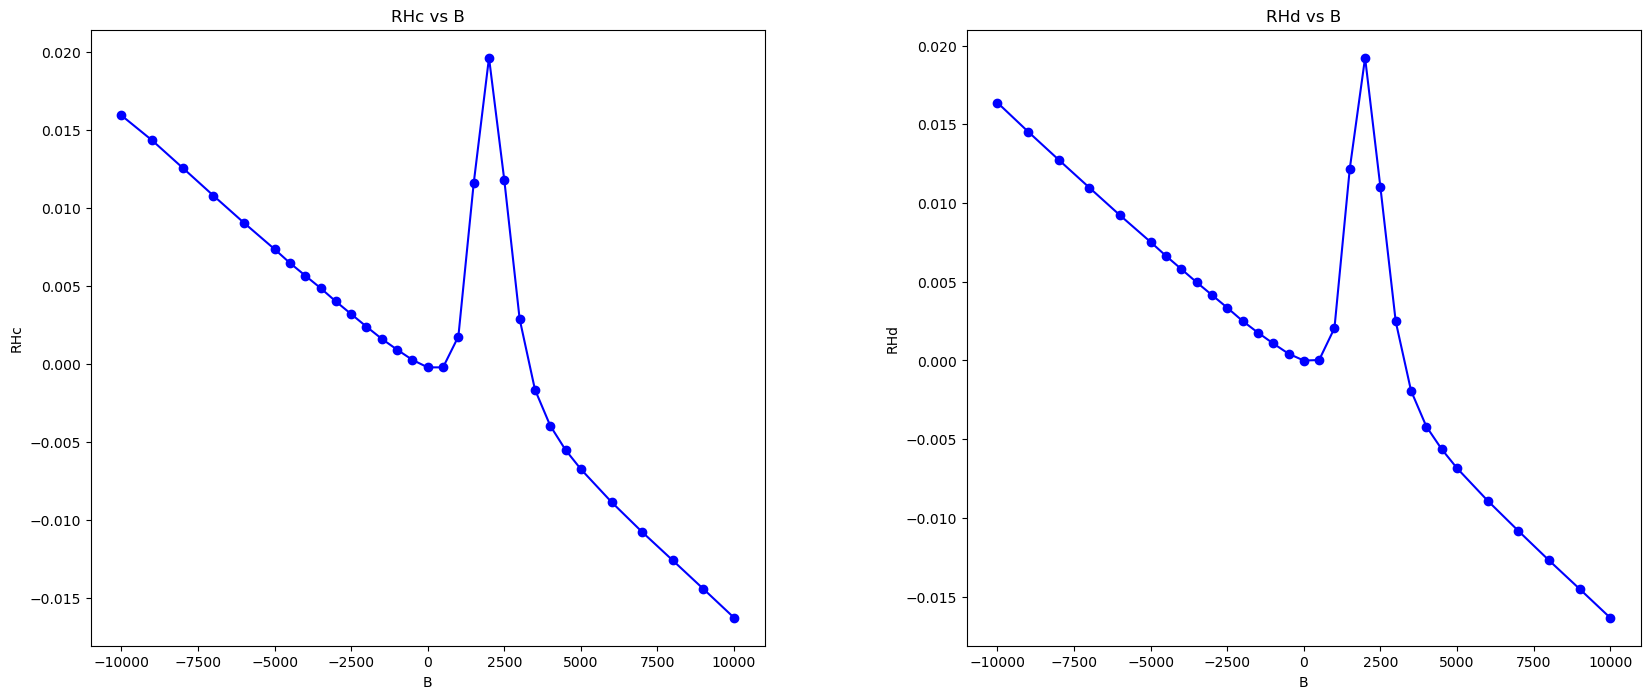

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

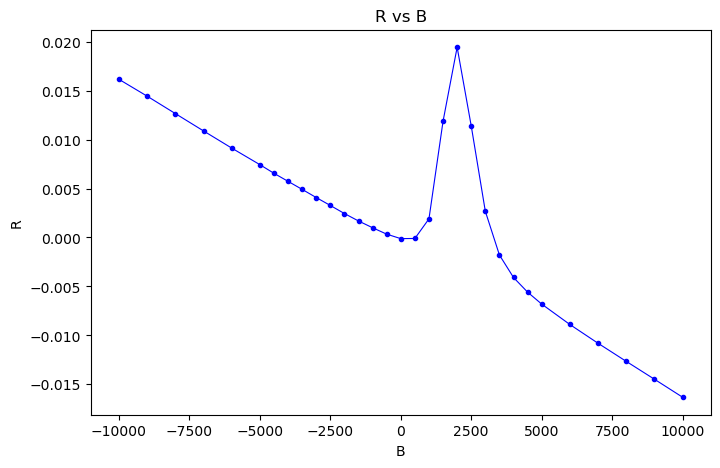

In [22]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

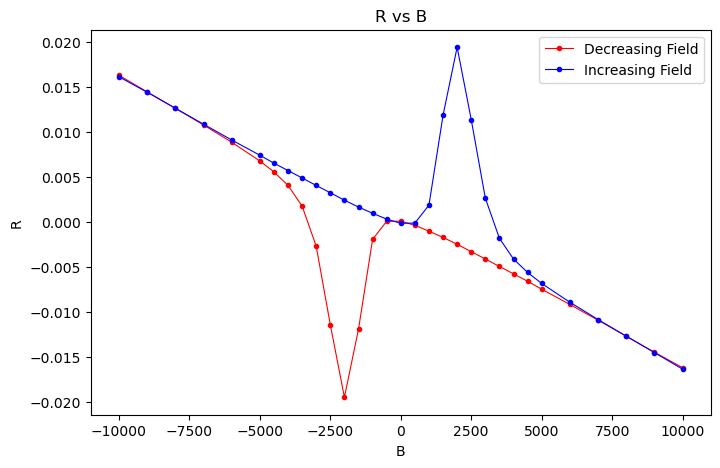

In [23]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [24]:
data.to_pickle("./pickle_data/119K_dec.pkl")
data2.to_pickle("./pickle_data/119K_inc.pkl")